# **Analysing PM Modi's Reply to No Confidence in Lok Sabha**

---



## **Importing Necessary Modules**

---



In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import re

In [6]:
try:

  nltk.download("punkt")
  nltk.download("stopwords")
  nltk.download("vader_lexicon")
  nltk.download("wordnet")

except:
  pass

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **Speech Data Preprocessing**

---



In [3]:
with open("PM_Speech.txt", "r", encoding = "utf-8") as fp:

  speech = fp.read()

In [7]:
cleaned_speech = re.sub(r"[^\w\s]" ,  "", speech)
cleaned_speech = cleaned_speech.lower()

In [11]:
cleaned_speech

'i have come to express immense gratitude towards each and every citizen of india for repeatedly showing their trust in the government\n\nmany key legislations did not get the discussion they deserved as the opposition put politics above them\n\nthis time period of the 21st century will impact the country for the next thousand years we all should have a single focus\n\nwe have given the youth of india a government free of scams\n\ntoday a trust has arisen in the heart of the poor to fulfill his dreams\n\nopposition is not able to see the trust of people as they are so steeped in distrust\n\nin 2028 when you will bring a no confidence motion the country will be among the top 3\n\nopposition believes in changing names but they cant change their work culture\n\nfreedom fighters and founding fathers of the country always opposed dynasty politics\n\ncrimes against women are unacceptable and the central government and the state government will work to ensure that the guilty are punished\n\nt

In [8]:
words = word_tokenize(cleaned_speech)

filtered_words = list()
for i in words:

  if(i not in stopwords.words("english")):

    filtered_words.append(i)

In [14]:
filtered_words[:10]

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing']

In [9]:
wnl = WordNetLemmatizer()
lem_words = [wnl.lemmatize(i) for i in filtered_words]

In [15]:
lem_words[:10]

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing']

In [16]:
sia = SentimentIntensityAnalyzer()
s_scores = [sia.polarity_scores(i)["compound"] for i in lem_words]
avg_s = sum(s_scores)/len(s_scores)

In [17]:
s_scores[:10]

[0.0, 0.0, 0.0, 0.5106, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [19]:
print("Average Sentiment Score :",avg_s)

Average Sentiment Score : 0.014298377028714108


In [20]:
pos_words = list()
neg_words = list()
neu_words = list()

for i in range(len(filtered_words)):

  if(s_scores[i] > 0.1):

    pos_words.append(filtered_words[i])

  elif(s_scores[i] < -0.1):

    neg_words.append(filtered_words[i])

  else:

    neu_words.append(filtered_words[i])

In [73]:
print("Number of Positive Words :", len(pos_words), ",  ", (len(pos_words)/len(filtered_words))*100, "%")
print("Number of Negative Words :", len(neg_words), ",   ", (len(neg_words)/len(filtered_words))*100, "%")
print("Number of Neutral Words  :", len(neu_words), ", ", (len(neu_words)/len(filtered_words))*100, "%")

Number of Positive Words : 138 ,   8.614232209737828 %
Number of Negative Words : 82 ,    5.118601747815231 %
Number of Neutral Words  : 1382 ,  86.26716604244695 %


In [21]:
pos_words[:10]

['gratitude',
 'trust',
 'free',
 'trust',
 'fulfill',
 'dreams',
 'trust',
 'confidence',
 'top',
 'freedom']

In [23]:
neg_words[:10]

['scams',
 'poor',
 'distrust',
 'crimes',
 'unacceptable',
 'guilty',
 'punished',
 'pressure',
 'stop',
 'poor']

In [24]:
neu_words[:10]

['come',
 'express',
 'immense',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'government']

In [26]:
pos_words_freq = nltk.FreqDist(pos_words)
neg_words_freq = nltk.FreqDist(neg_words)
neu_words_freq = nltk.FreqDist(neu_words)

In [32]:
df_pos = pd.DataFrame(pos_words_freq.most_common(10), columns = ["word", "freq"])
df_neg = pd.DataFrame(neg_words_freq.most_common(10), columns = ["word", "freq"])
df_neu = pd.DataFrame(neu_words_freq.most_common(10), columns = ["word", "freq"])

## **Speech Data Analysis**

---



### **Categorising Words on Sentiments**

---



In [27]:
print("Positive Words Frequency :", pos_words_freq)
print("Negative Words Frequency :", neg_words_freq)
print("Neutral Words Frequency  :", neu_words_freq)

Positive Words Frequency : <FreqDist with 74 samples and 138 outcomes>
Negative Words Frequency : <FreqDist with 61 samples and 82 outcomes>
Neutral Words Frequency  : <FreqDist with 658 samples and 1382 outcomes>


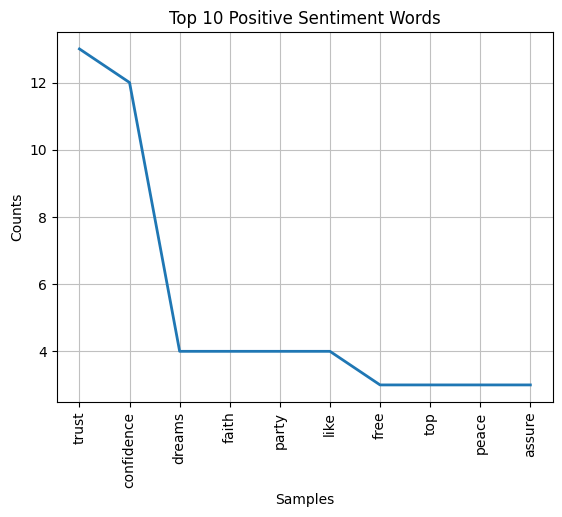

<Axes: title={'center': 'Top 10 Positive Sentiment Words'}, xlabel='Samples', ylabel='Counts'>

In [41]:
pos_words_freq.plot(10, title = "Top 10 Positive Sentiment Words")

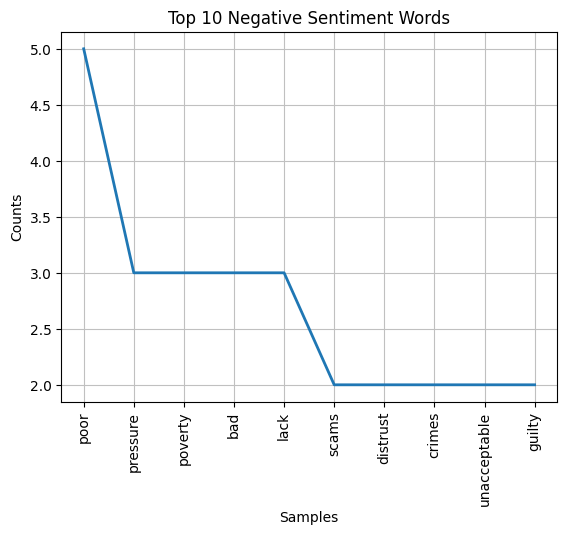

<Axes: title={'center': 'Top 10 Negative Sentiment Words'}, xlabel='Samples', ylabel='Counts'>

In [34]:
neg_words_freq.plot(10, title = "Top 10 Negative Sentiment Words")

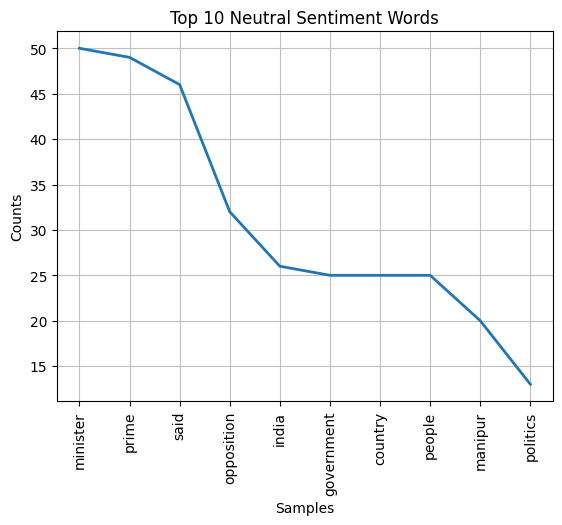

<Axes: title={'center': 'Top 10 Neutral Sentiment Words'}, xlabel='Samples', ylabel='Counts'>

In [35]:
neu_words_freq.plot(10, title = "Top 10 Neutral Sentiment Words")

In [36]:
import plotly.express as px
import plotly.graph_objects as go

In [37]:
px.bar(df_pos, x = "word", y = "freq", title = "Top 10 Positive Sentiment Words")

In [42]:
px.bar(df_neg, x = "word", y = "freq", title = "Top 10 Negative Sentiment Words")

In [43]:
px.bar(df_neu, x = "word", y = "freq", title = "Top 10 Neutral Sentiment Words")

### **Word Clouds**

---



Text(0.5, 1.0, 'Positive Sentiment Words')

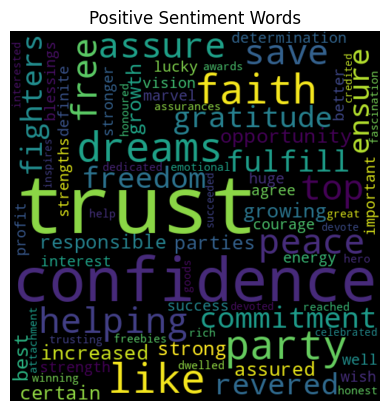

In [51]:
wc_pos = WordCloud(width=500, height=500).generate_from_frequencies(pos_words_freq)
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Words")

Text(0.5, 1.0, 'Negative Sentiment Words')

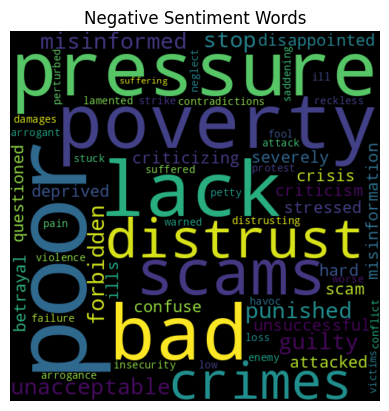

In [52]:
wc_neg = WordCloud(width=500, height=500).generate_from_frequencies(neg_words_freq)
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment Words")

Text(0.5, 1.0, 'Neutral Sentiment Words')

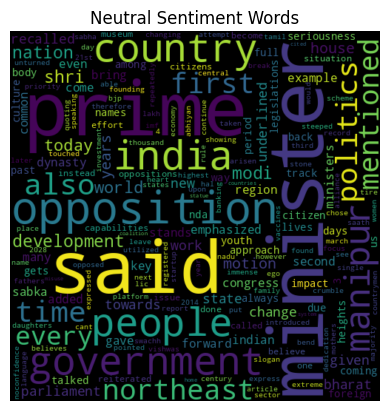

In [53]:
wc_neu = WordCloud(width=500, height=500).generate_from_frequencies(neu_words_freq)
plt.imshow(wc_neu, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral Sentiment Words")

In [55]:
words_freq = nltk.FreqDist(lem_words)
words_freq

FreqDist({'minister': 54, 'prime': 49, 'said': 46, 'opposition': 35, 'india': 27, 'country': 27, 'government': 26, 'people': 25, 'manipur': 20, 'time': 15, ...})

Text(0.5, 1.0, 'Words of the Speech')

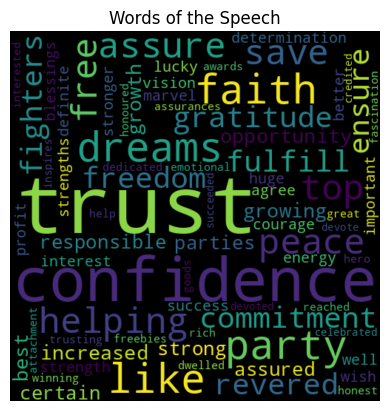

In [59]:
wc = WordCloud(width=500, height=500).generate_from_frequencies(words_freq)
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Words of the Speech")

### **Listing Keywords in the Speech**

---



In [94]:
try:
  !pip install keybert

except:
  pass

In [77]:
from keybert import KeyBERT

key_bert = KeyBERT()
keywords = key_bert.extract_keywords(speech)

In [79]:
for i in keywords:
    print(i[0])

manipur
nehru
bjp
rajya
gandhi


### **Emotions in the Speech**

---



In [95]:
try:
  !pip install nrclex

except:
  pass

In [81]:
from nrclex import NRCLex

text_emotion = NRCLex(cleaned_speech)
emotions = text_emotion.affect_frequencies

In [96]:
df_emo = pd.DataFrame({"Emotion":list(emotions.keys()), "Freq": list(emotions.values())})
df_emo

,Emotion,Freq
0,fear,0.106650
1,anger,0.105395
2,anticip,0.000000
3,trust,0.132999
4,surprise,0.022585
5,positive,0.234630
6,negative,0.166876
7,sadness,0.046424
8,disgust,0.033877
9,joy,0.065245


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_emo, *['Freq'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_emo, *['Freq'], **{})
chart

In [92]:
px.bar(df_emo, x='Emotion', y='Freq', color='Emotion', labels={'Emotion': 'Emotion', 'Freq': 'Frequency'}, title='Emotion Frequencies in the Speech')